In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

In [5]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [14, 6]

output_dir = Path('../results/plots')
output_dir.mkdir(parents=True, exist_ok=True)

original_df = pd.read_csv('../data/student_habits_performance.csv')
processed_df = pd.read_csv('../results/processed_student_data.csv')
with open('../results/processing_stats.json') as f:
    stats = json.load(f)

In [6]:
def save_and_show_plot(fig, filename, dpi=300):
    """Salva a figura e a mostra no notebook"""
    filepath = output_dir / filename
    fig.savefig(filepath, dpi=dpi, bbox_inches='tight')
    plt.show()
    plt.close(fig)

def plot_comparison(original_col, processed_col, title, xlabel=None, ylabel=None, filename=None):
    """Plota comparação lado a lado entre dados originais e processados"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    if original_col.dtype == 'object':
        order = original_col.value_counts().index
        sns.countplot(x=original_col, ax=ax1, order=order)
        
        total = len(original_col)
        for p in ax1.patches:
            height = p.get_height()
            ax1.text(p.get_x() + p.get_width()/2., height + 3,
                    f'{height/total:.1%}',
                    ha='center', fontsize=10)
    else:
        sns.histplot(original_col, kde=True, ax=ax1, bins=20)
        ax1.axvline(original_col.mean(), color='r', linestyle='--')
        ax1.text(original_col.mean()*1.05, ax1.get_ylim()[1]*0.9,
                f'Média: {original_col.mean():.2f}',
                color='r')
    
    ax1.set_title(f'Original - {title}')
    ax1.set_xlabel(xlabel or title)
    ax1.set_ylabel(ylabel or 'Contagem')
    
    if processed_col.dtype == 'object':
        order = processed_col.value_counts().index
        sns.countplot(x=processed_col, ax=ax2, order=order)
        
        total = len(processed_col)
        for p in ax2.patches:
            height = p.get_height()
            ax2.text(p.get_x() + p.get_width()/2., height + 3,
                    f'{height/total:.1%}',
                    ha='center', fontsize=10)
    else:
        sns.histplot(processed_col, kde=True, ax=ax2, bins=20)
        ax2.axvline(processed_col.mean(), color='r', linestyle='--')
        ax2.text(processed_col.mean()*1.05, ax2.get_ylim()[1]*0.9,
                f'Média: {processed_col.mean():.2f}',
                color='r')
    
    ax2.set_title(f'Processado - {title}')
    ax2.set_xlabel(xlabel or title)
    ax2.set_ylabel(ylabel or 'Contagem')
    
    plt.tight_layout()
    
    if filename:
        save_and_show_plot(fig, filename)
    else:
        plt.show()
        plt.close(fig)

def plot_outlier_stats(stats_dict, title, filename=None):
    """Plota estatísticas de outliers"""
    if not stats_dict:
        print(f"Nenhum outlier removido para {title}")
        return
    
    fig, ax = plt.subplots(figsize=(10, 6))
    stats_df = pd.DataFrame(stats_dict).T
    stats_df['percent_outliers'].plot(kind='bar', ax=ax)
    
    ax.set_title(f'Percentual de Outliers Removidos - {title}')
    ax.set_ylabel('Percentual (%)')
    ax.set_xlabel('Variável')
    
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), 
                   textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    if filename:
        save_and_show_plot(fig, filename)
    else:
        plt.show()
        plt.close(fig)


=== TRATAMENTO DE VALORES FALTANTES ===
{'parental_education_level': 'Valores nulos preenchidos com "High School"'}

=== CODIFICAÇÃO DE VARIÁVEIS ===

Variável: gender
Mapeamento de frequência:
  Female: 481
  Male: 477
  Other: 42

Variável: part_time_job
Mapeamento de frequência:
  No: 785
  Yes: 215

Variável: extracurricular_participation
Mapeamento de frequência:
  No: 682
  Yes: 318

=== OUTLIERS NUMÉRICOS ===


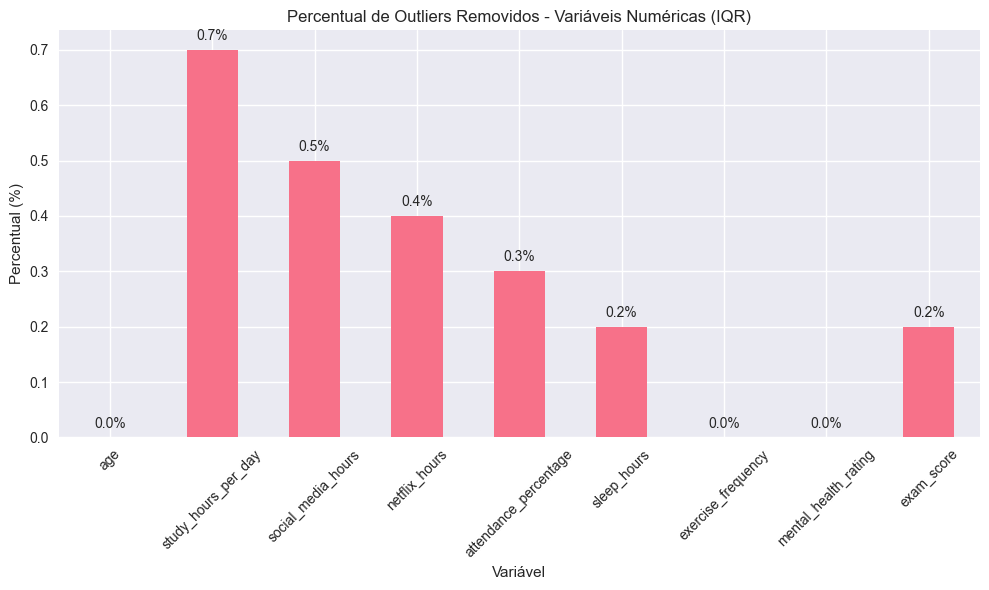

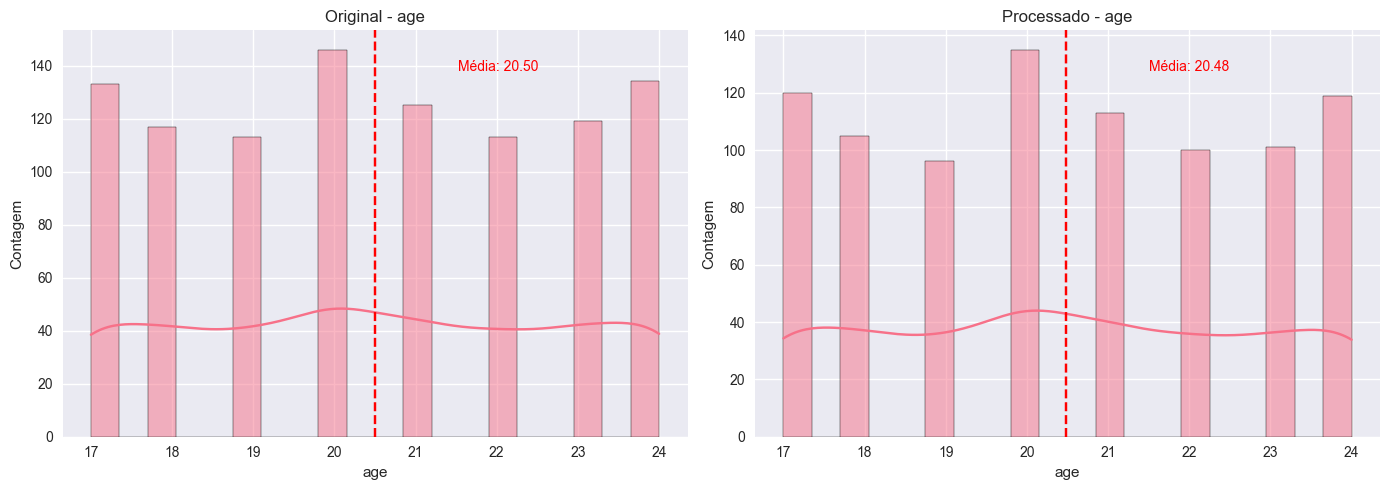

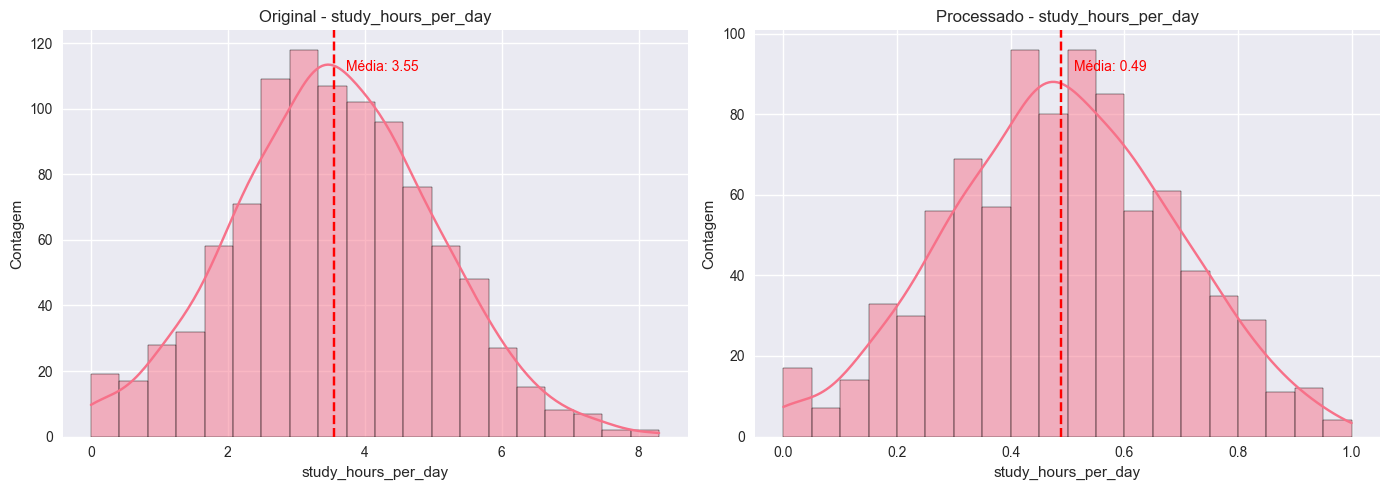

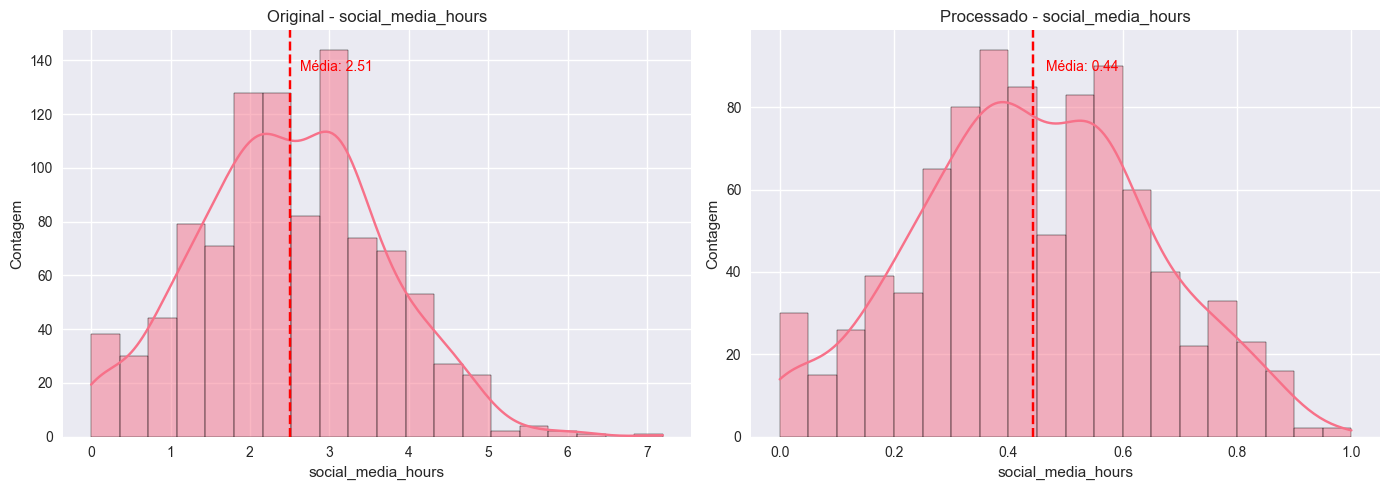

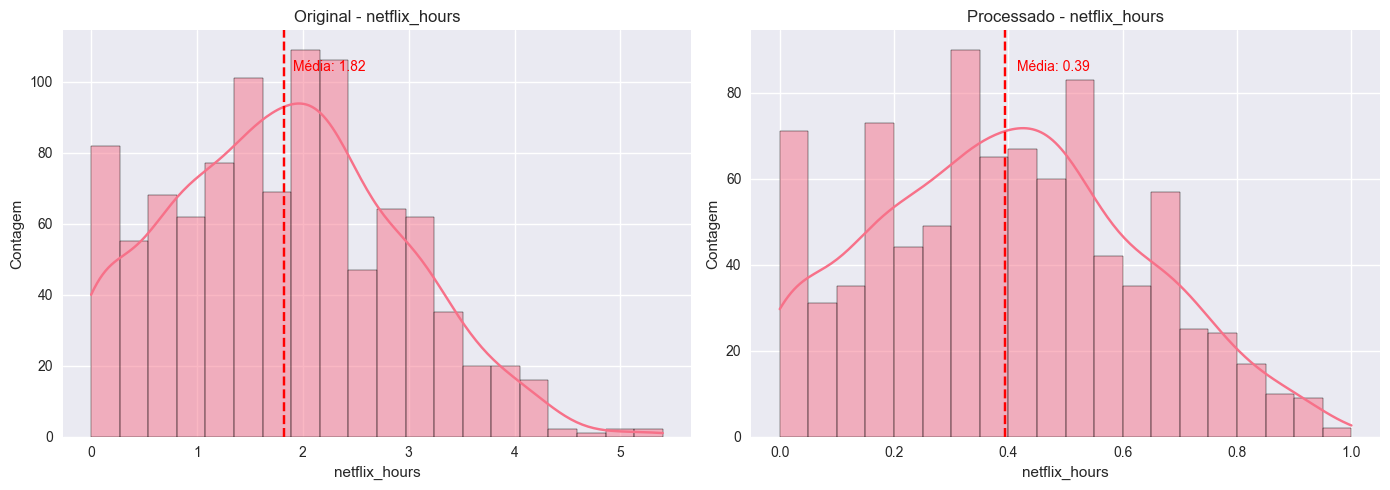

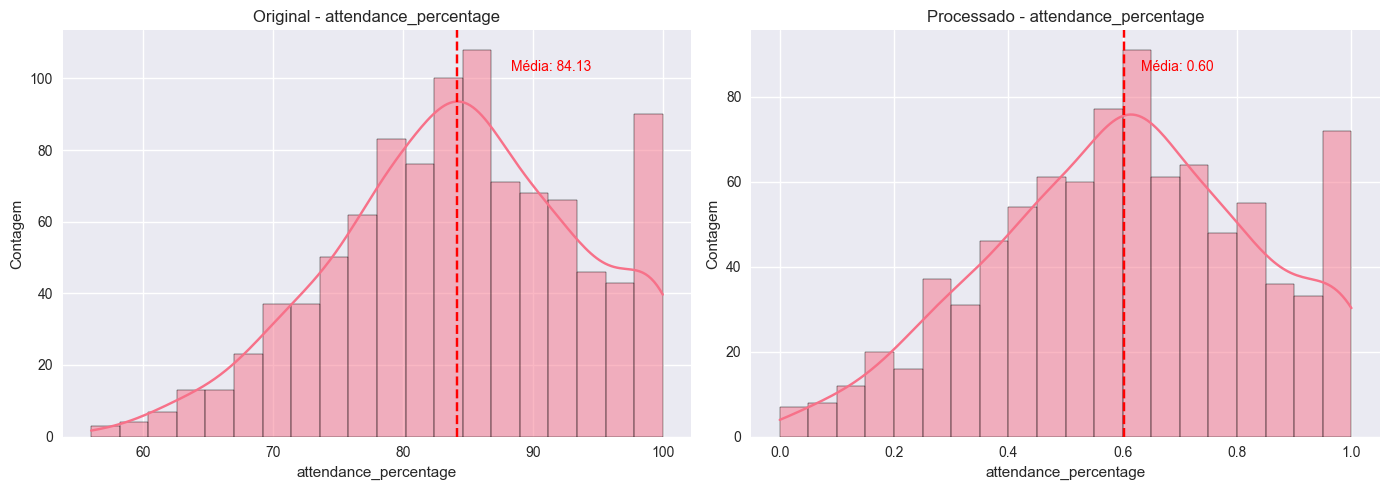

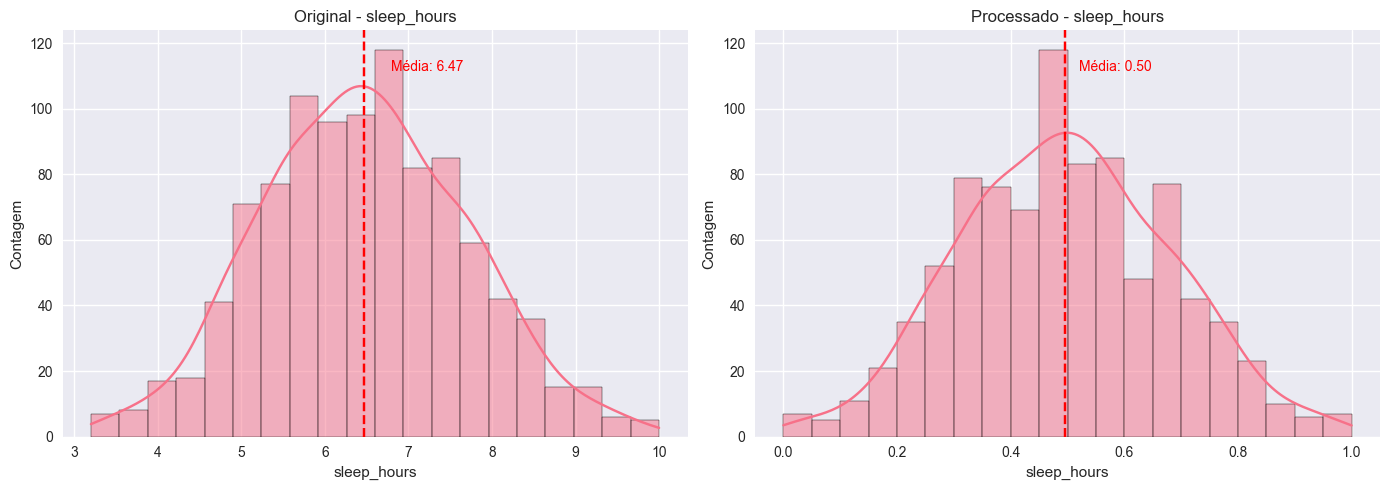

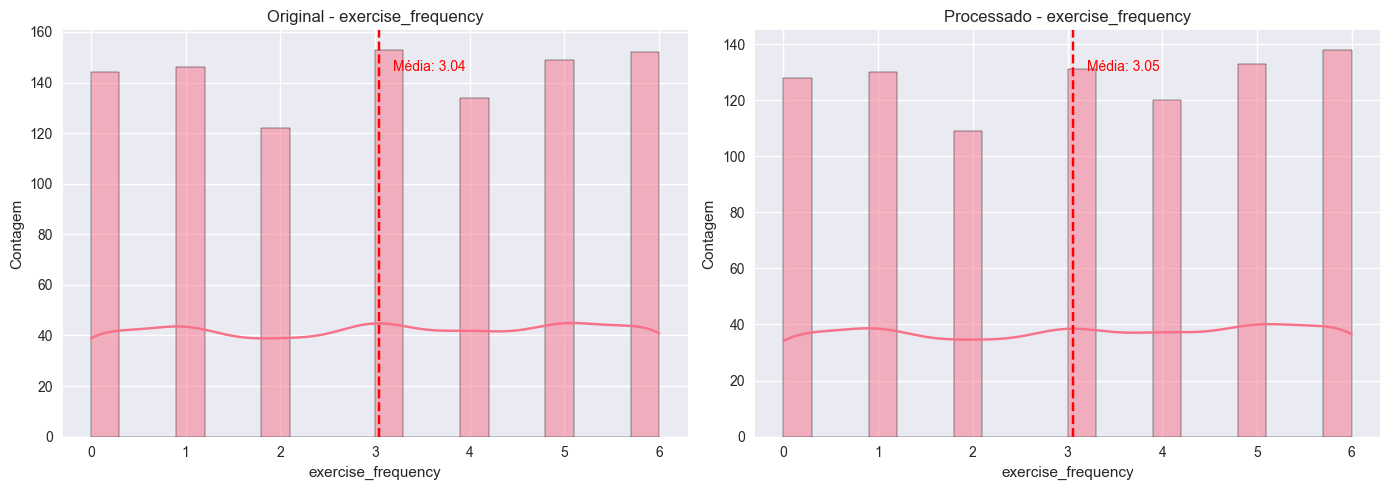

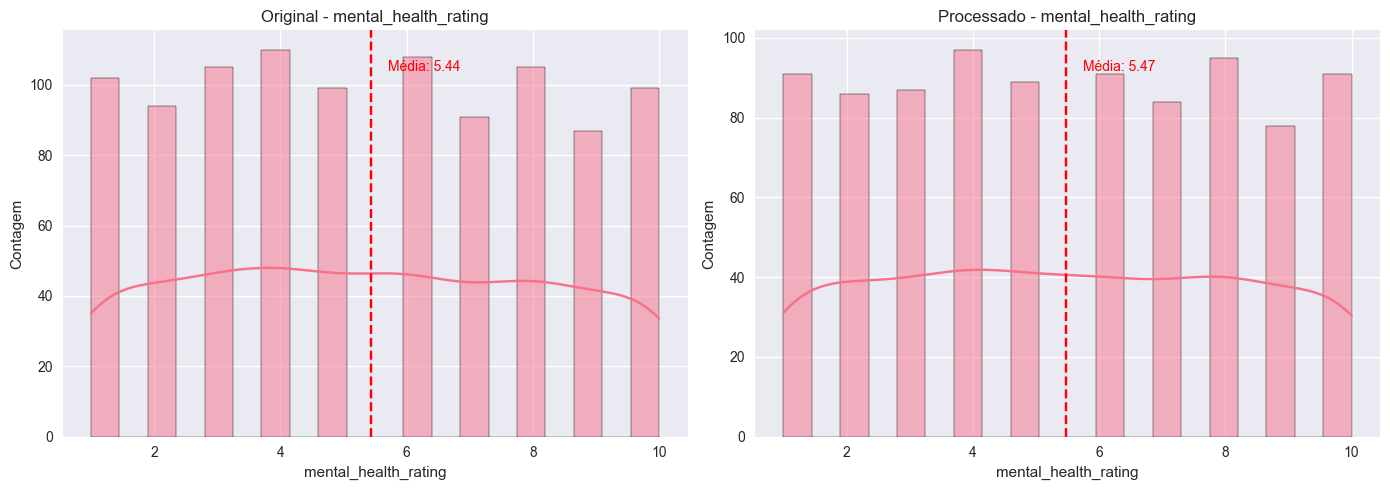

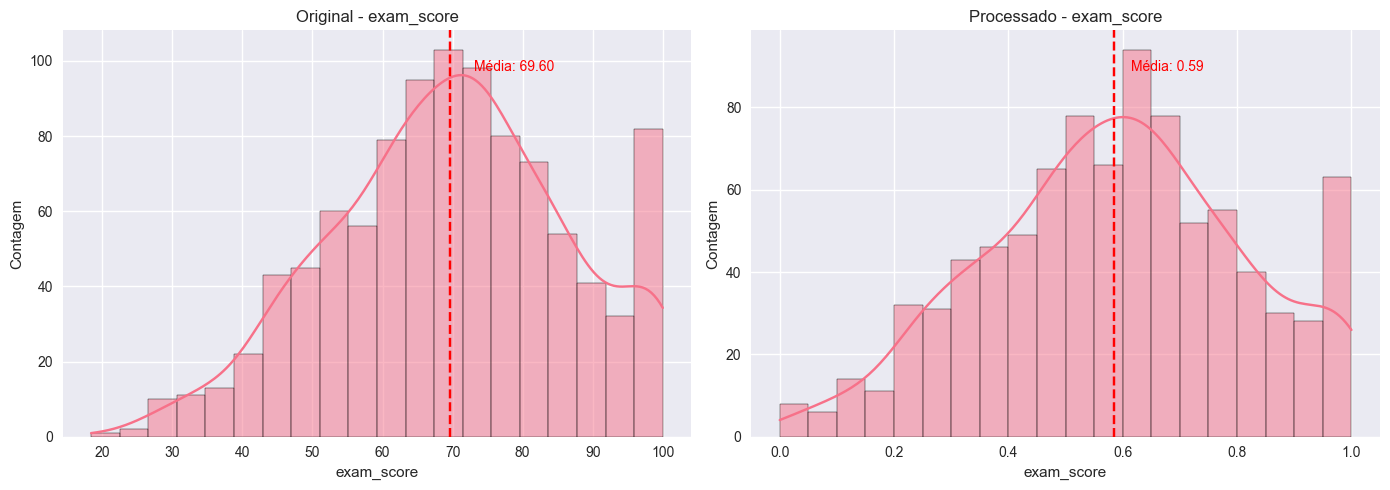


=== OUTLIERS ORDINAIS ===


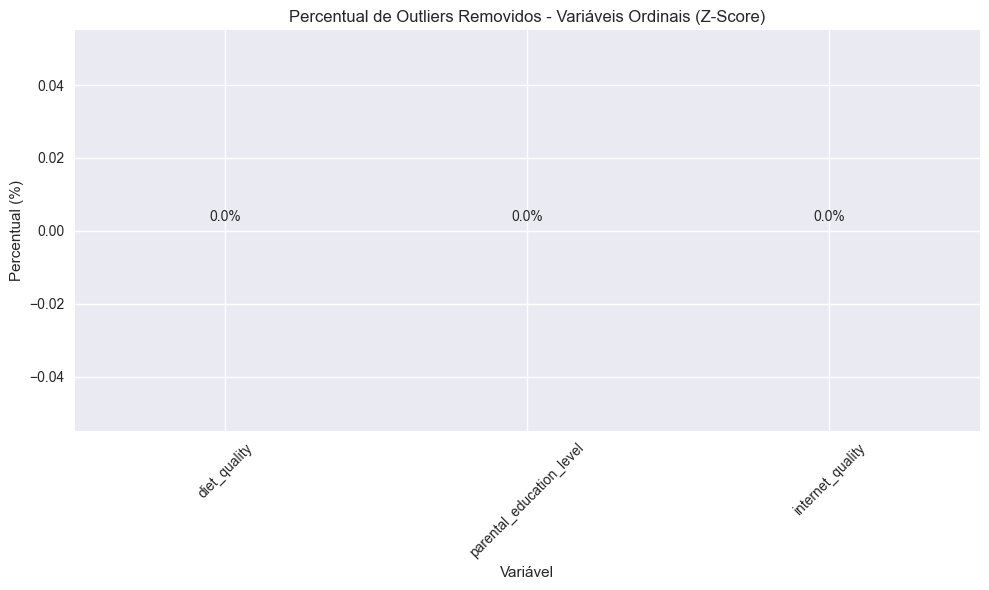

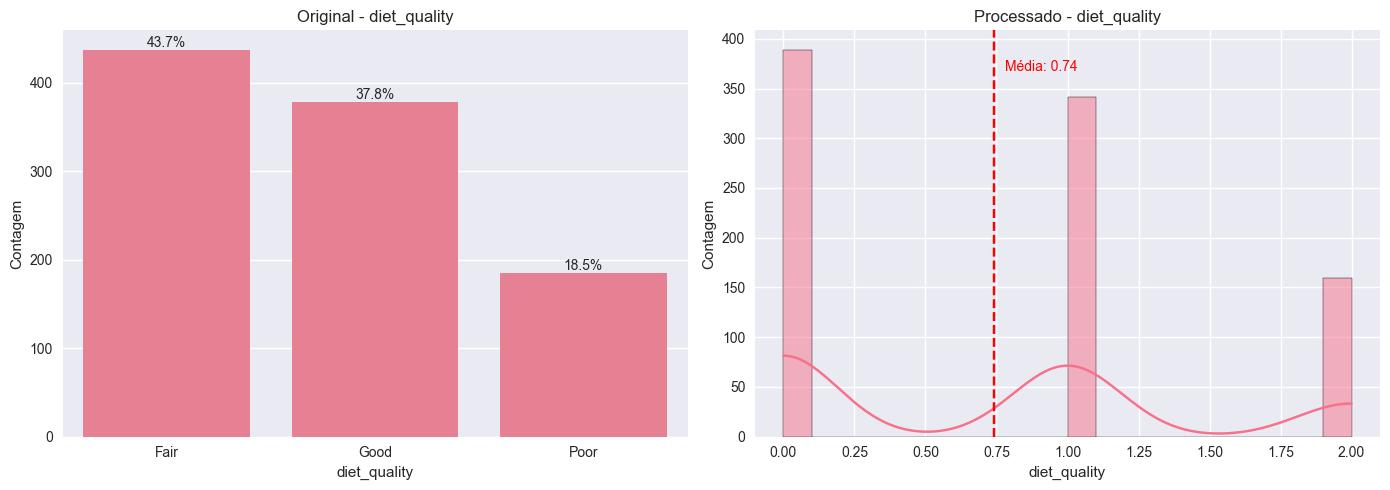

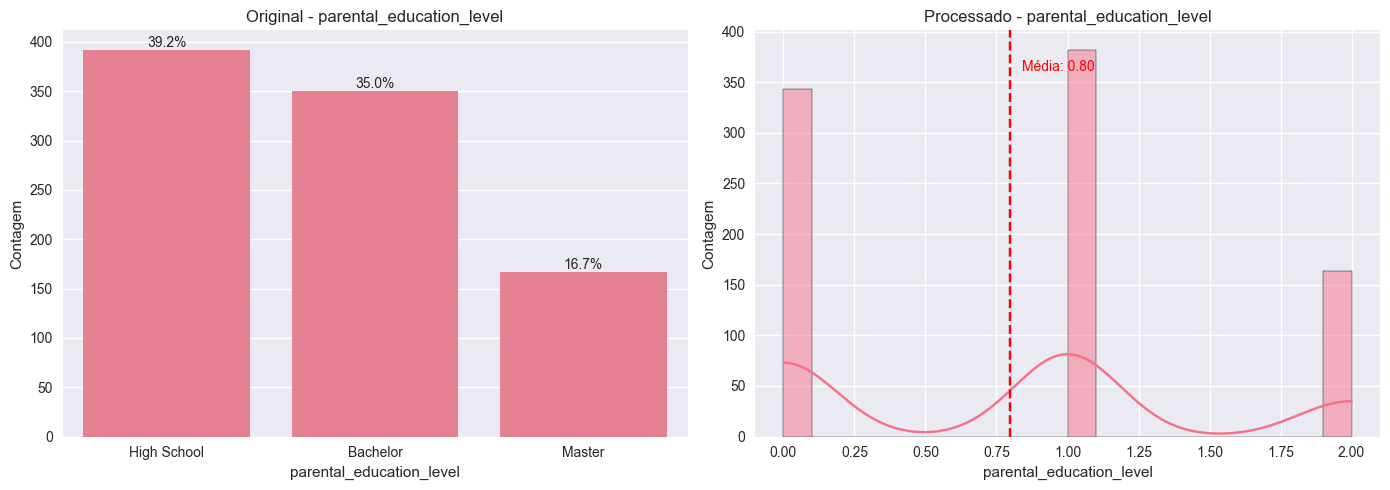

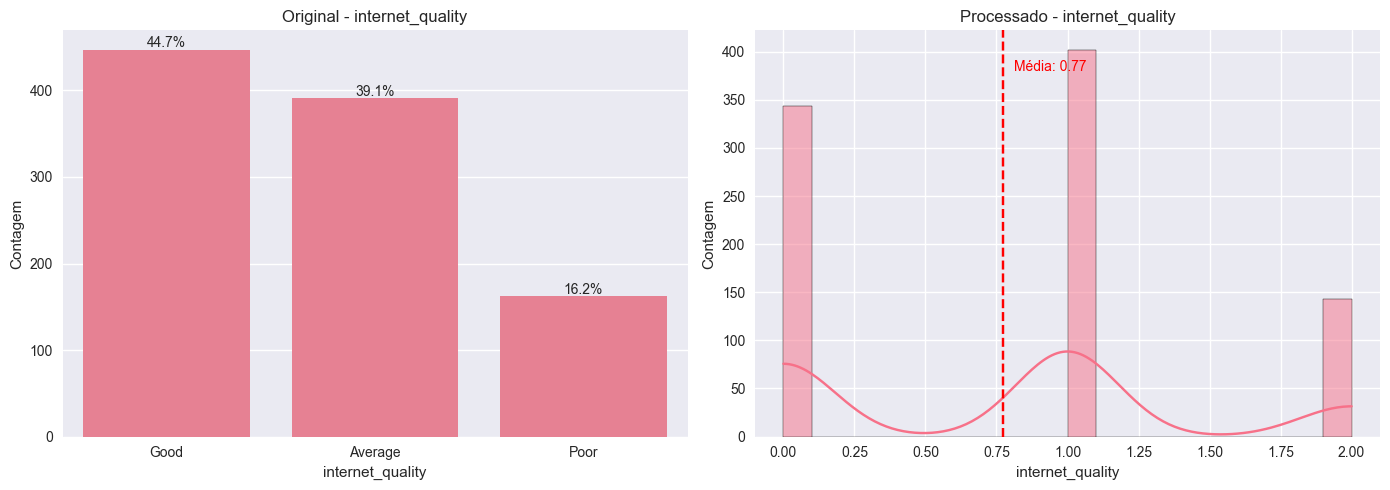


=== OUTLIERS NOMINAIS ===


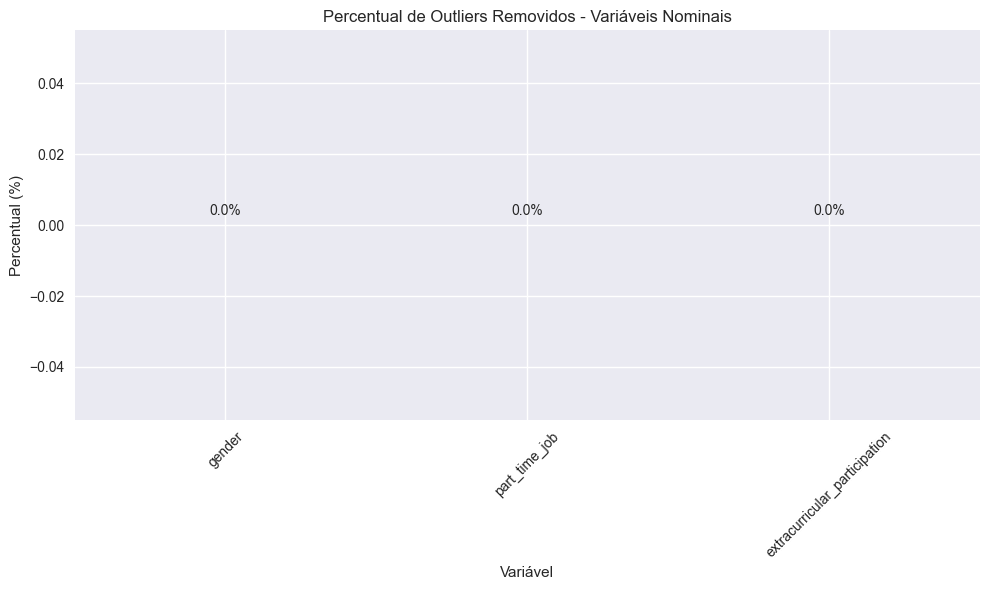

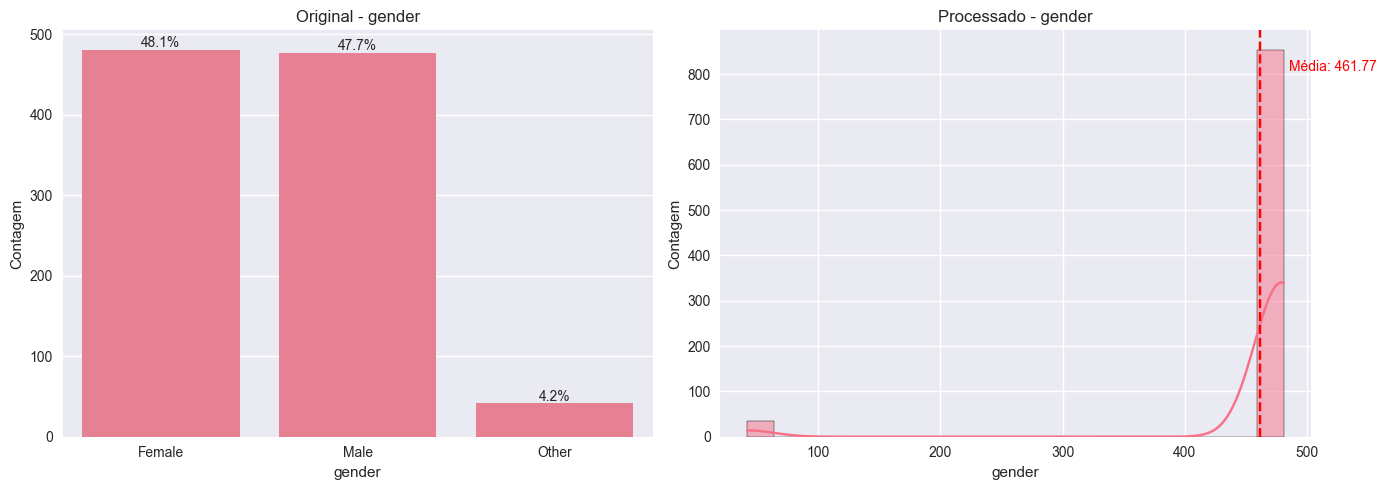

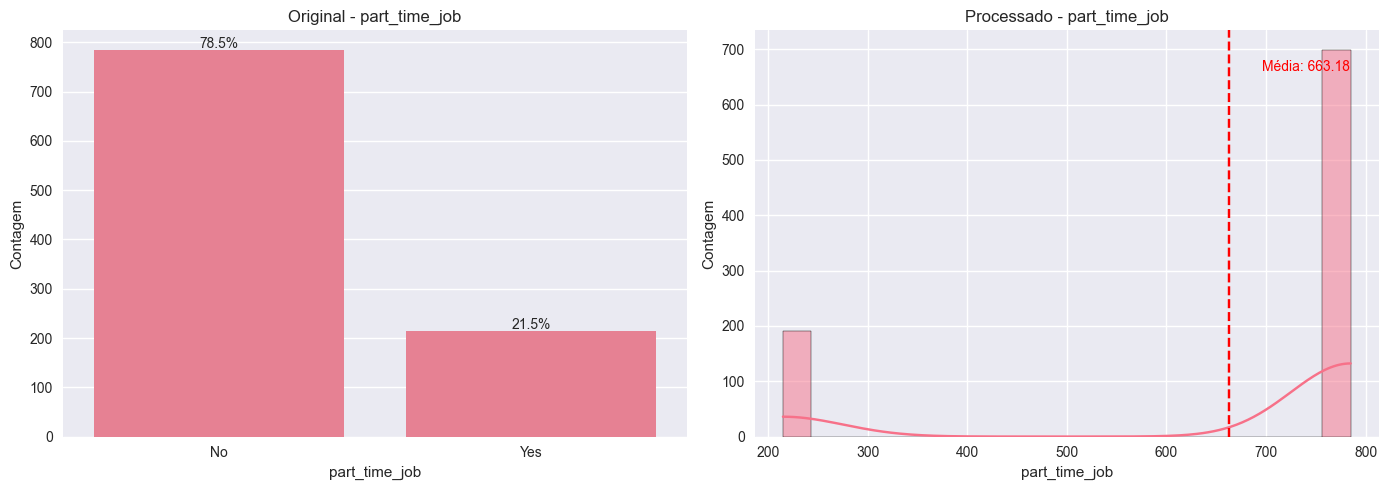

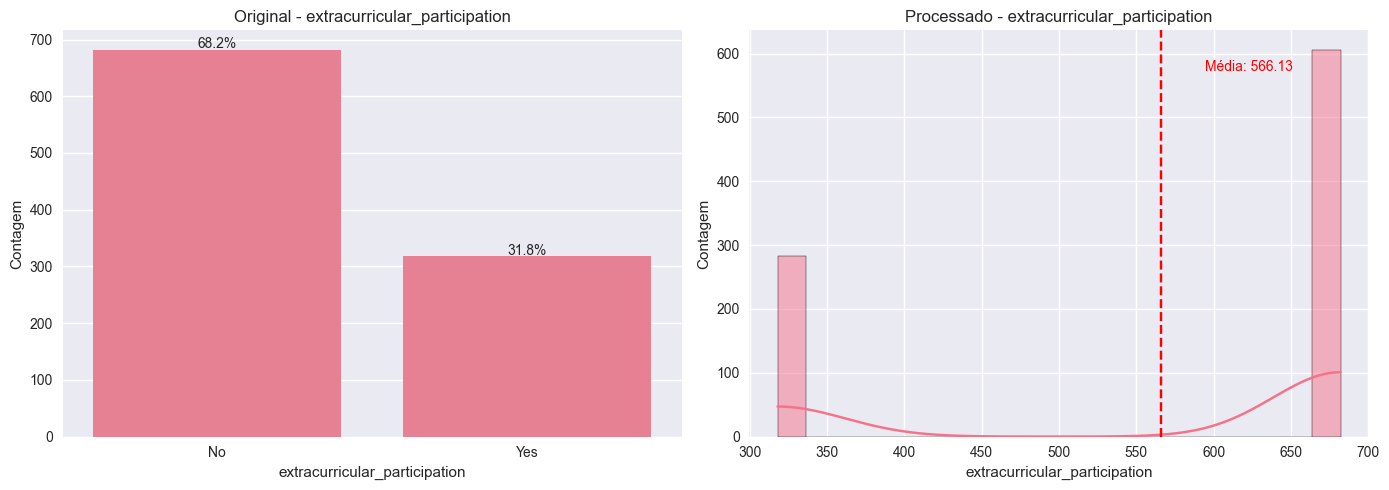


=== NORMALIZAÇÃO ===

Variável: study_hours_per_day
Original: min=0.00, max=7.20
Normalizado: min=0, max=1


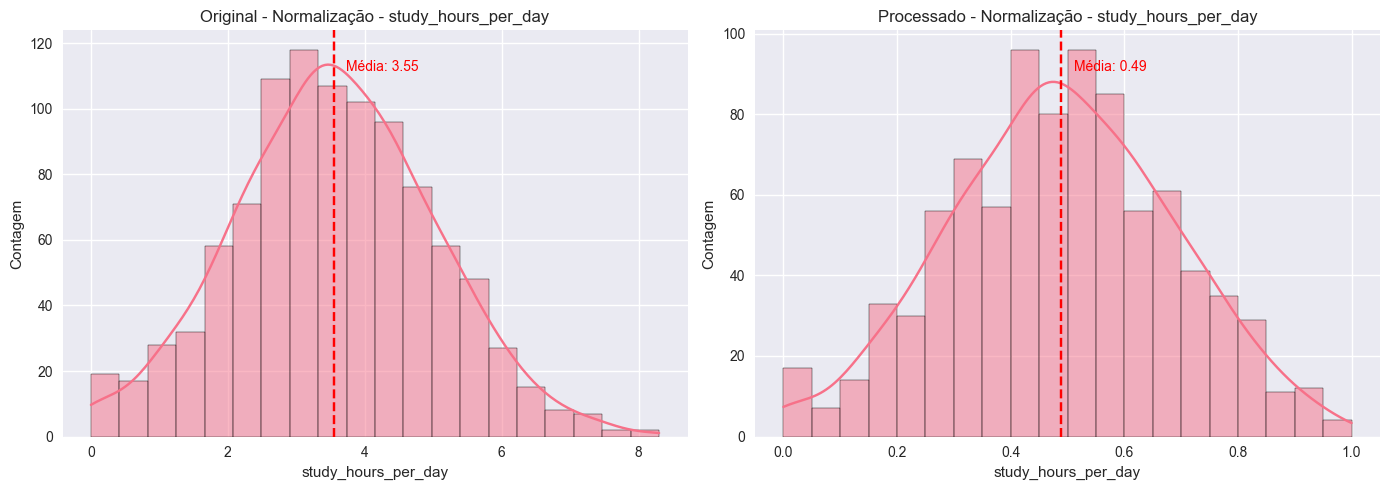


Variável: social_media_hours
Original: min=0.00, max=5.60
Normalizado: min=0, max=1


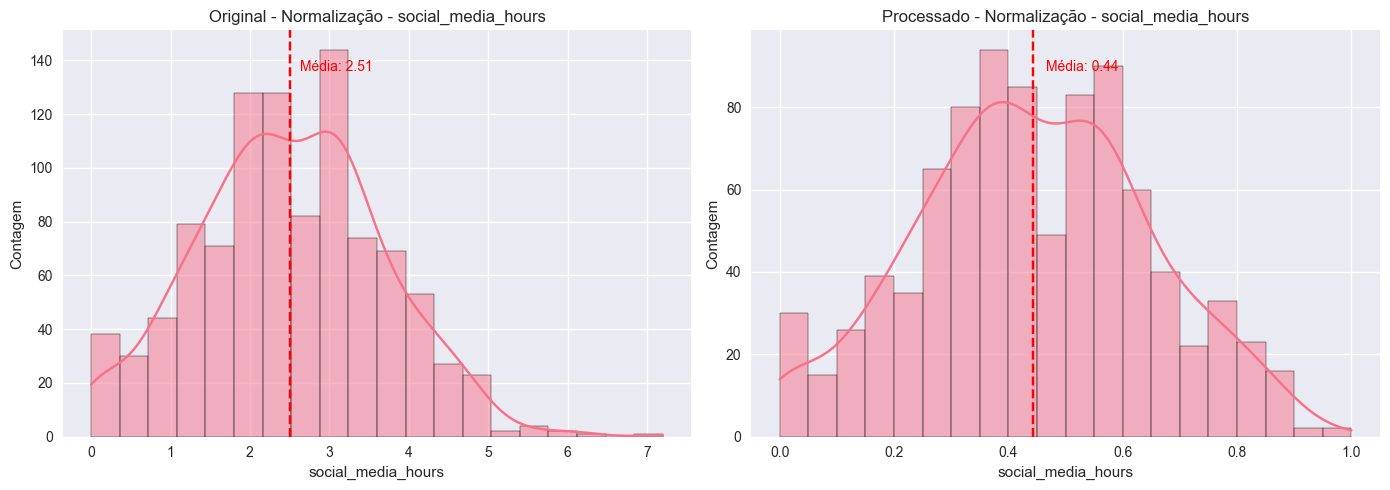


Variável: netflix_hours
Original: min=0.00, max=4.60
Normalizado: min=0, max=1


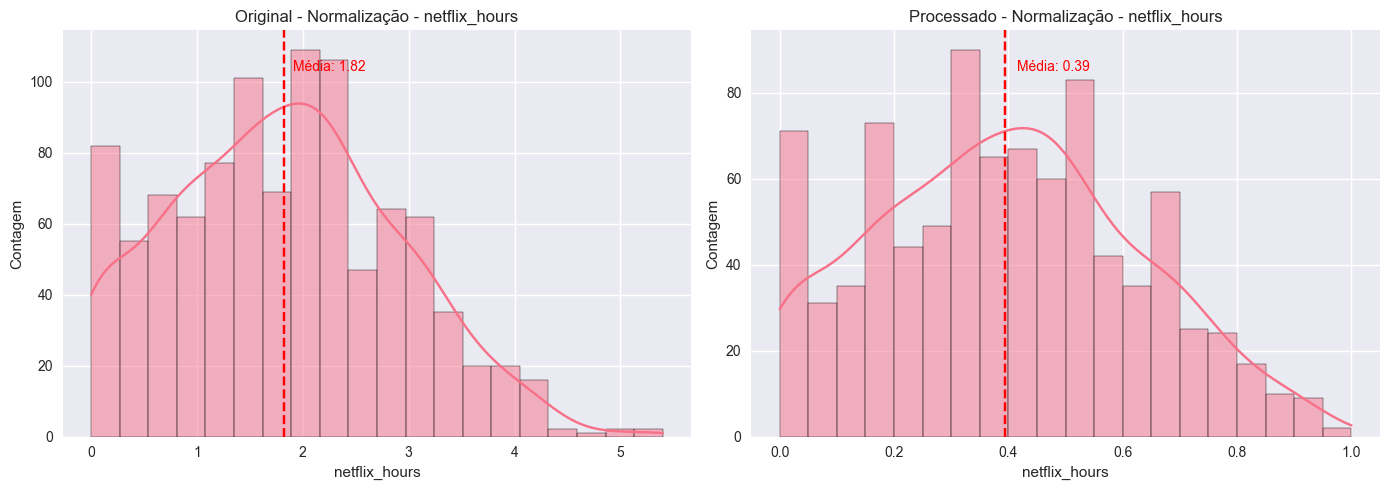


Variável: attendance_percentage
Original: min=59.50, max=100.00
Normalizado: min=0, max=1


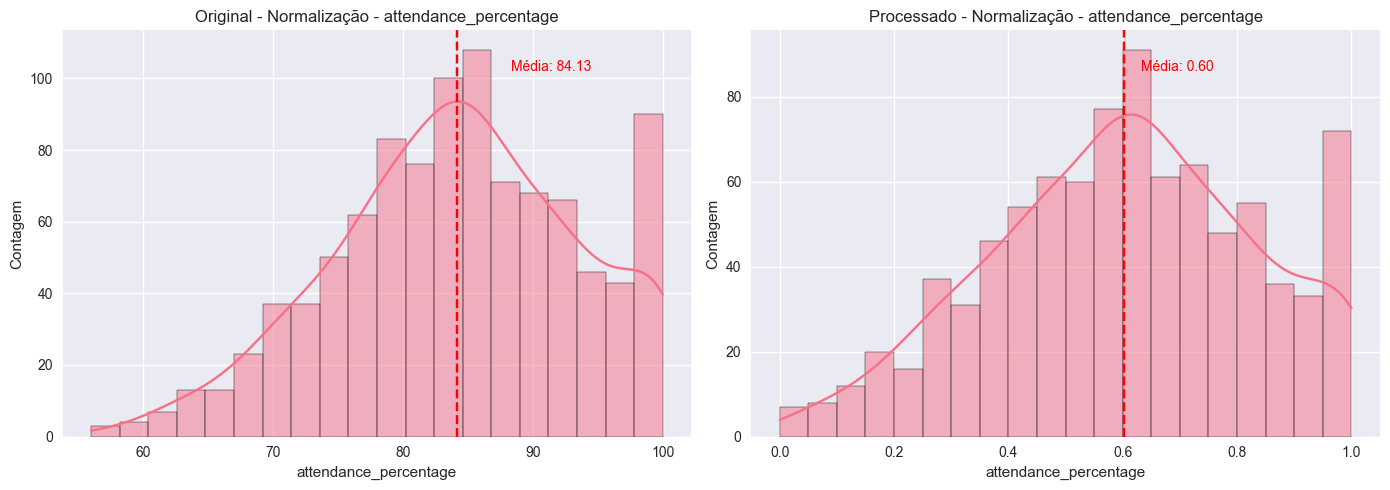


Variável: sleep_hours
Original: min=3.20, max=9.80
Normalizado: min=0, max=1


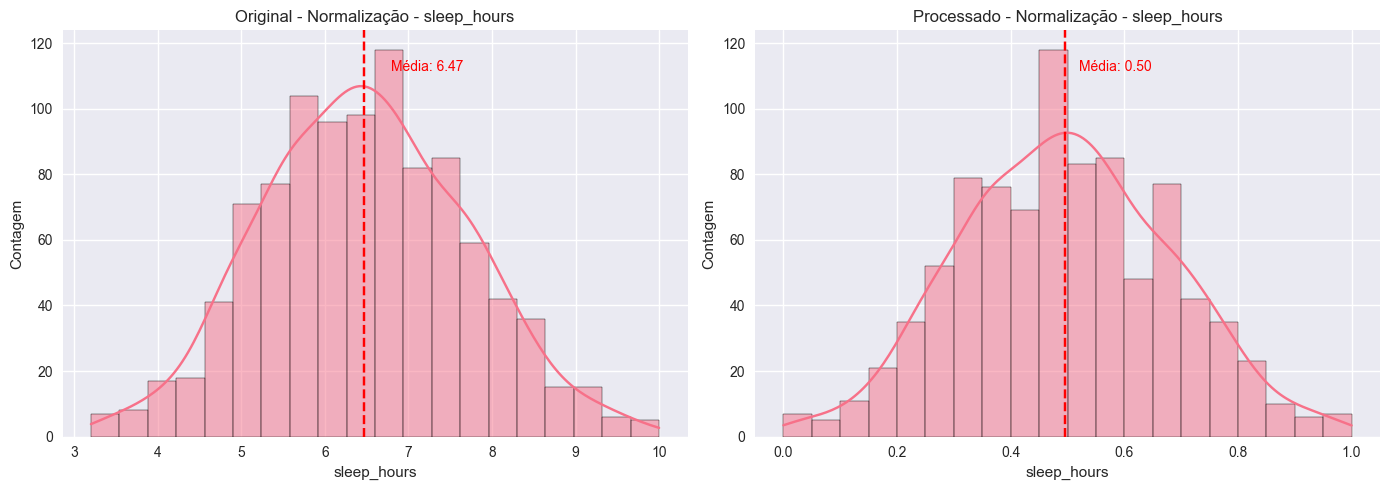


Variável: exam_score
Original: min=26.20, max=100.00
Normalizado: min=0, max=1


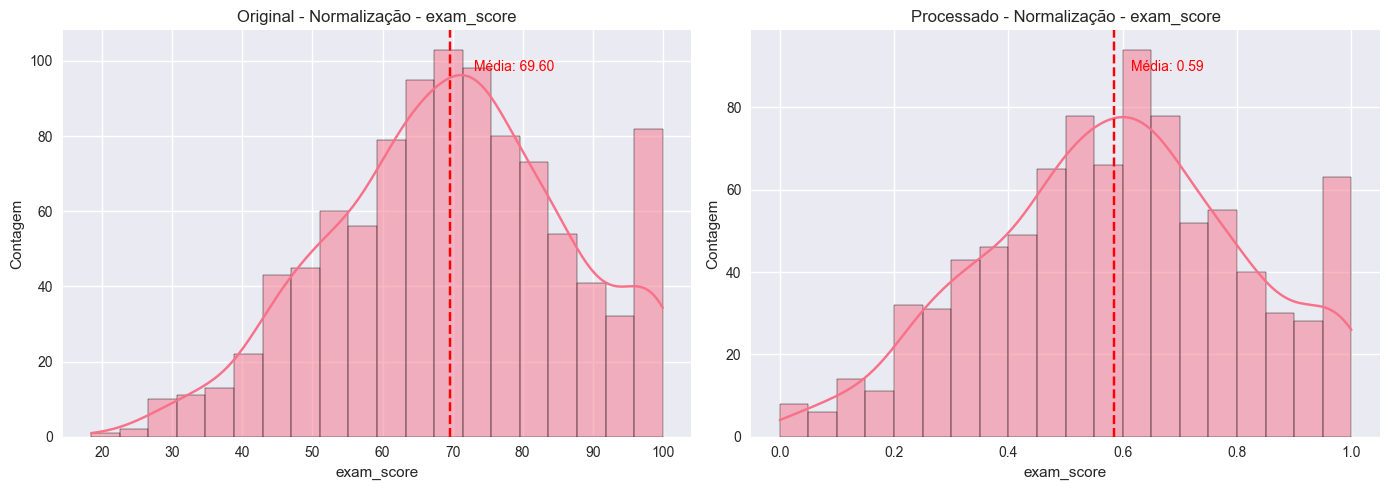


=== ANÁLISE DE FREQUÊNCIA DE VARIÁVEIS ORDINAIS ===


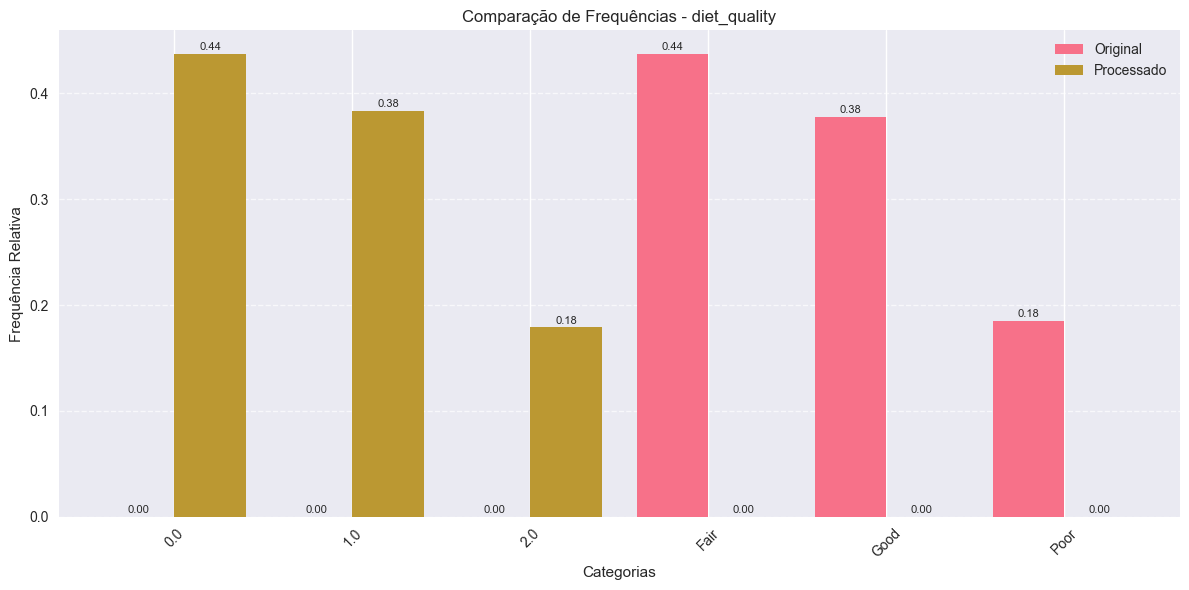

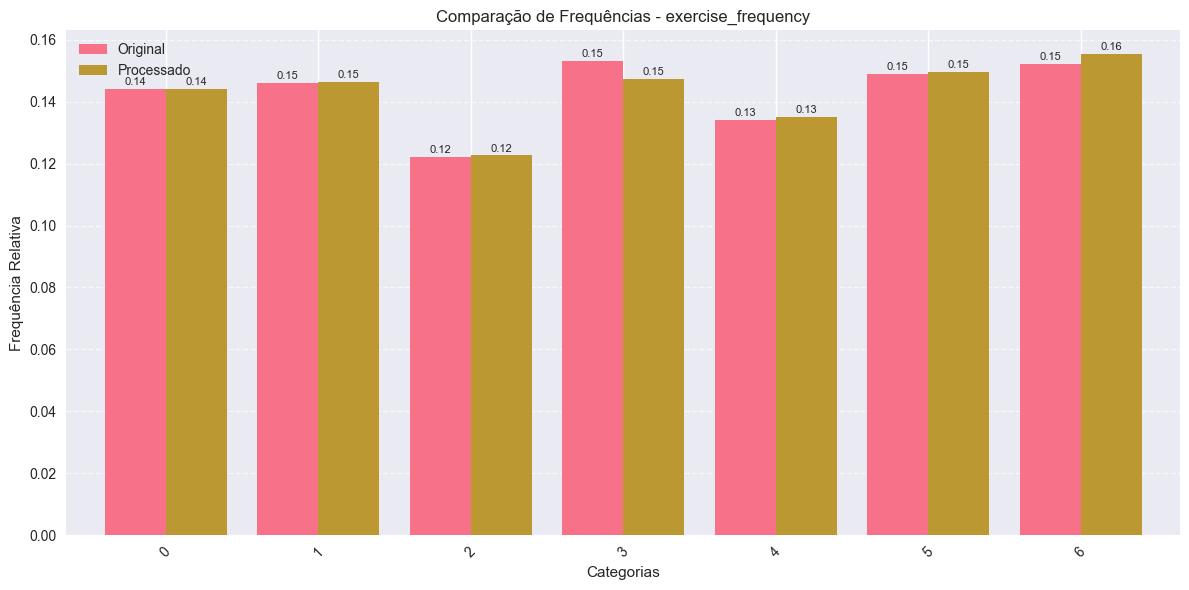

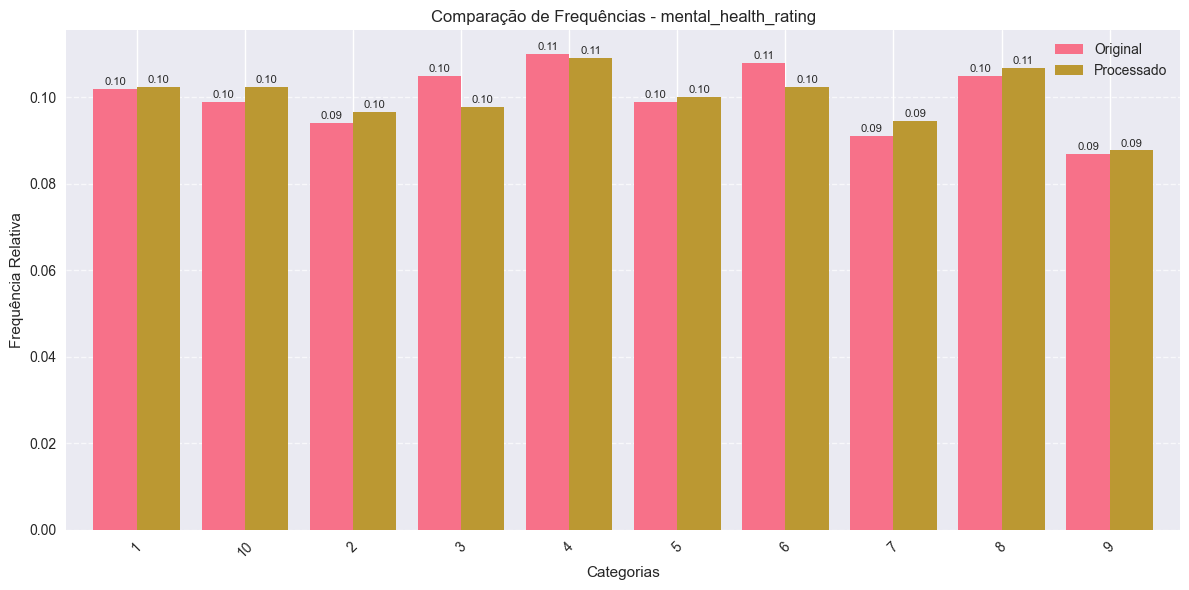


Todos os gráficos foram salvos em: /Users/joaopedronoronha/dev/aprendizado_de_maquina/results/plots


In [7]:
print("\n=== TRATAMENTO DE VALORES FALTANTES ===")
print(stats['missing_values'])

print("\n=== CODIFICAÇÃO DE VARIÁVEIS ===")
for col, mapping in stats['frequency_encoding'].items():
    print(f"\nVariável: {col}")
    print("Mapeamento de frequência:")
    for cat, freq in mapping.items():
        print(f"  {cat}: {freq}")

print("\n=== OUTLIERS NUMÉRICOS ===")
plot_outlier_stats(stats['numeric_outliers'], 'Variáveis Numéricas (IQR)', 'outliers_numericos.png')

for col in stats['numeric_outliers'].keys():
    plot_comparison(
        original_df[col], 
        processed_df[col], 
        title=col,
        xlabel=col,
        ylabel='Contagem',
        filename=f'comparison_numeric_{col}.png'
    )

if 'ordinal_outliers' in stats:
    print("\n=== OUTLIERS ORDINAIS ===")
    plot_outlier_stats(stats['ordinal_outliers'], 'Variáveis Ordinais (Z-Score)', 'outliers_ordinais.png')
    
    for col in stats['ordinal_outliers'].keys():
        plot_comparison(
            original_df[col], 
            processed_df[col], 
            title=col,
            xlabel=col,
            ylabel='Contagem',
            filename=f'comparison_ordinal_{col}.png'
        )

if 'nominal_outliers' in stats:
    print("\n=== OUTLIERS NOMINAIS ===")
    plot_outlier_stats(stats['nominal_outliers'], 'Variáveis Nominais', 'outliers_nominais.png')
    
    for col in stats['nominal_outliers'].keys():
        plot_comparison(
            original_df[col], 
            processed_df[col], 
            title=col,
            xlabel=col,
            ylabel='Contagem',
            filename=f'comparison_nominal_{col}.png'
        )

print("\n=== NORMALIZAÇÃO ===")
for col, params in stats['normalization'].items():
    print(f"\nVariável: {col}")
    print(f"Original: min={params['min_original']:.2f}, max={params['max_original']:.2f}")
    print(f"Normalizado: min={params['min_scaled']}, max={params['max_scaled']}")
    
    plot_comparison(
        original_df[col], 
        processed_df[col], 
        title=f"Normalização - {col}",
        xlabel=col,
        ylabel='Contagem',
        filename=f'normalization_{col}.png'
    )

ordinal_cols = ['diet_quality', 'exercise_frequency', 'mental_health_rating']
print("\n=== ANÁLISE DE FREQUÊNCIA DE VARIÁVEIS ORDINAIS ===")

for col in ordinal_cols:
    if col in original_df.columns and col in processed_df.columns:
        original_freq = original_df[col].value_counts(normalize=True).sort_index()
        processed_freq = processed_df[col].value_counts(normalize=True).sort_index()
        
        original_freq.index = original_freq.index.astype(str)
        processed_freq.index = processed_freq.index.astype(str)
        
        comparison_df = pd.DataFrame({
            'Original': original_freq,
            'Processado': processed_freq
        }).fillna(0)
        
        comparison_df = comparison_df.sort_index()
        
        fig, ax = plt.subplots(figsize=(12, 6))
        comparison_df.plot(kind='bar', ax=ax, width=0.8)
        
        ax.set_title(f'Comparação de Frequências - {col}')
        ax.set_xlabel('Categorias')
        ax.set_ylabel('Frequência Relativa')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.2f}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), 
                       textcoords='offset points', fontsize=8)
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        save_and_show_plot(fig, f'freq_comparison_{col}.png')

print(f"\nTodos os gráficos foram salvos em: {output_dir.resolve()}")